Model Accuracy: 0.49
Confusion Matrix:
 [[1544 1611]
 [1529 1516]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.49      0.50      3155
           1       0.48      0.50      0.49      3045

    accuracy                           0.49      6200
   macro avg       0.49      0.49      0.49      6200
weighted avg       0.49      0.49      0.49      6200



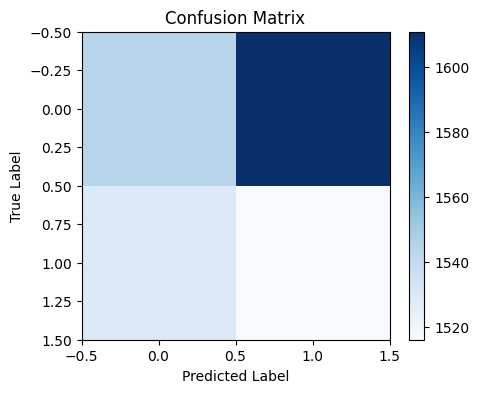

In [5]:
# Import Required Libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler  # For feature normalization
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics

# Load the EEG Dataset
file_path = "s00.csv"  # Path to the dataset file
df = pd.read_csv(file_path)  # Load CSV file into a DataFrame

# Rename Columns
df.columns = [f'Channel_{i+1}' for i in range(df.shape[1])]

# Generate Labels (0 = Healthy, 1 = Tumor-Affected)
# Assuming the dataset doesn't have labels, we create synthetic labels for demonstration
np.random.seed(42)  # For reproducibility
df['Label'] = np.random.choice([0, 1], size=len(df))  # Random labels for classification

# Separate Features and Target Variable
X = df.drop(columns=['Label'])  # EEG signals (features)
y = df['Label']  # Labels (target)

# Normalize the Data
scaler = StandardScaler()  # Create a StandardScaler object
X_scaled = scaler.fit_transform(X)  # Normalize features

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Support Vector Machine (SVM) Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # Radial Basis Function (RBF) kernel
svm_model.fit(X_train, y_train)  # Train model

# Make Predictions
y_pred = svm_model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
class_report = classification_report(y_test, y_pred)  # Generate classification report

# Print Results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()